In [1]:
import sys
import os
# Add the project root to sys.path
sys.path.append(os.path.abspath('..'))

from Functions.gradientdescent_lib import *
from Functions.crossvalidation_lib import *

c:\Users\maxfo\Python\Lib\site-packages\sklearn\utils\_param_validation.py:11: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.sparse import csr_matrix, issparse


Mean score of OLS   = 0.09157036752787907


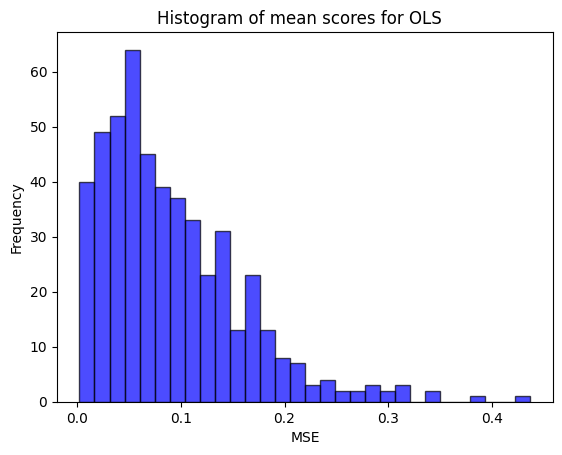

Mean score of Ridge = 0.10231797972899788


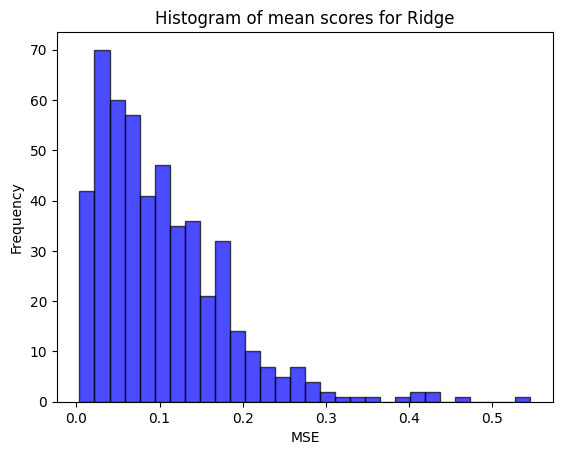

Mean score of Lasso = 0.10646659880094833


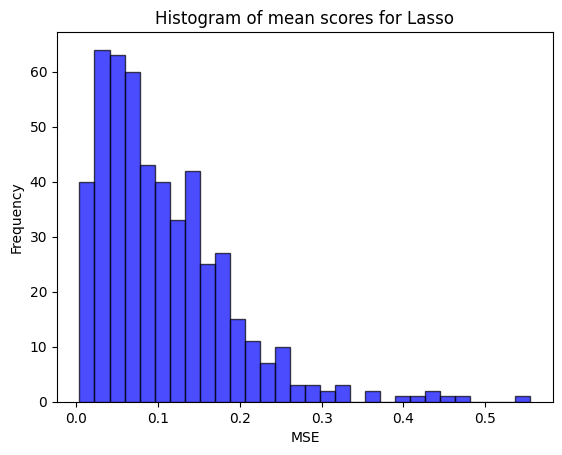

In [2]:
x_train, x_test, y_train, y_test = generateData(2500, noise = 0.25)
x_train = x_train.flatten(); x_test = x_test.flatten()


learningRate = 0.05
n_features = 4
noIntercept = False
n_folds = 500

optimizer = Optimizers.ADAgrad(learningRate, n_features+int(not noIntercept))

gradient_OLS = Gradients.OLS()
gradient_Ridge = Gradients.Ridge(0.01)
gradient_Lasso = Gradients.Lasso(0.01)

GRADIENTS = [gradient_OLS, gradient_Ridge, gradient_Lasso]

for gradient in GRADIENTS:
    model = GradientDescent(n_features, noIntercept=False)
    model.setOptimizer(optimizer)
    model.setGradient(gradient)
    
    mean_score, scores = cross_validation(n_folds, x_train, y_train, model.evaluation_function())

    print(f'Mean score of {gradient} = {mean_score}')

    plt.hist(scores, bins=30, alpha=0.7, color='blue', edgecolor='black')
    # Add titles and labels
    plt.title(f'Histogram of mean scores for {gradient}')
    plt.xlabel('MSE')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

